# Project Proposal

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,Resting_Electrocardiographic_Results,Max_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Exercise_Slope,Number_Major_Vessels,Thal,Diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,Absent
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,Present
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,Present
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,Present
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,Present
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,Absent


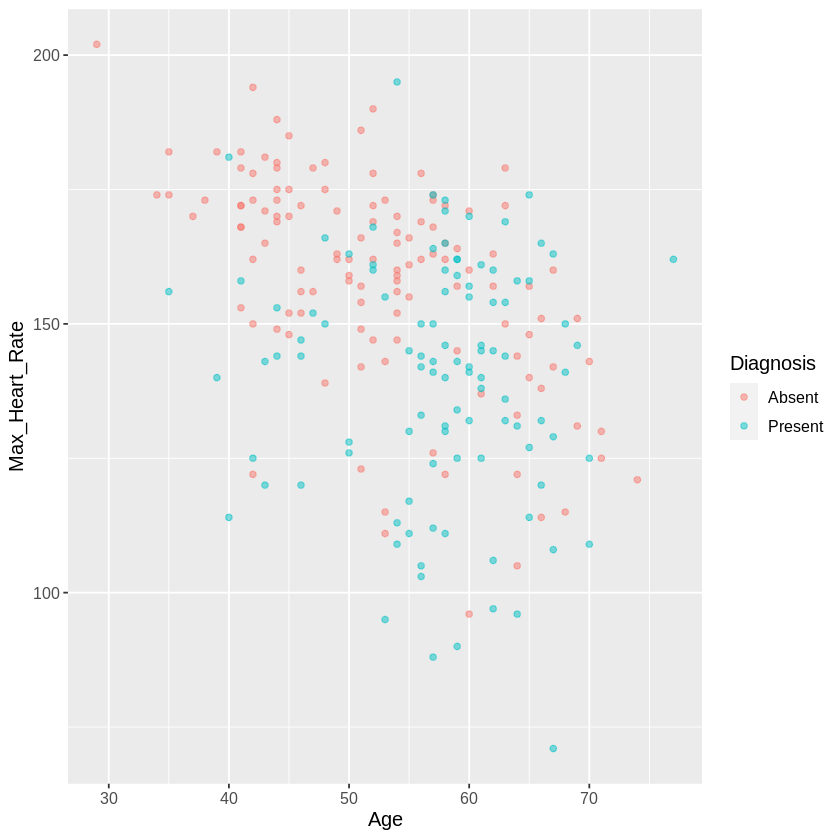

In [54]:
library(forcats)
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
library(ggplot2)
heart_data <- read_delim("processed.cleveland.data", delim = ",", col_names = FALSE)
colnames(heart_data)[1]="Age"
colnames(heart_data)[2]="Sex"
colnames(heart_data)[3]="Chest_Pain_Type"
colnames(heart_data)[4]="Resting_Blood_Pressure"
colnames(heart_data)[5]="Cholesterol"
colnames(heart_data)[6]="Fasting_Blood_Sugar"
colnames(heart_data)[7]="Resting_Electrocardiographic_Results"
colnames(heart_data)[8]="Max_Heart_Rate"
colnames(heart_data)[9]="Exercised_Induced_Angina"
colnames(heart_data)[10]="ST_Depression"
colnames(heart_data)[11]="Exercise_Slope"
colnames(heart_data)[12]="Number_Major_Vessels"
colnames(heart_data)[13]="Thal"
colnames(heart_data)[14]="Diagnosis"

heart_data_mutated <- heart_data|>
mutate(Diagnosis = as.factor(Diagnosis)) 

levels(heart_data_mutated$Diagnosis)  <- c("Absent", "Present", "Present", "Present", "Present")

heart_data_mutated

heart_split <- initial_split(heart_data_mutated, prop = 0.75, strata = Diagnosis)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

heart_plot <- ggplot(heart_train, 
                     aes(x= Age, y=Max_Heart_Rate, 
                         color=Diagnosis))+
geom_point(alpha=0.5)+
labs(x="Age", y="Max_Heart_Rate", color="Diagnosis")+
  theme(text = element_text(size = 12)) 


heart_plot




# Introduction

Heart disease is the leading cause of death in the US, with one death every 34 seconds (1). Cardiovascular disease research is crucial in helping scientists understand more about heart diseases, and in finding ways to prevent and treat them. 

In our project, we will use the variables age and cholestrol levels as predictors to build a classification model that predicts the prevelance of heart disease in a new data point(a new individual). We will be using the processed Cleveland data set which is part of the UCI Machine Learning Repository's Heart Disease Data Set, as the repository labels this data set as the processed data set used by machine learning researchers. The data set contains 14 variables, including the prevelance of heart disease.

 

# References 

(1) Centers for Disease Control and Prevention, National Center for Health Statistics. About Multiple Cause of Death, 1999–2020. CDC WONDER Online Database website. Atlanta, GA: Centers for Disease Control and Prevention; 2022. Accessed February 21, 2022